In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
#Summarize the data
df.describe().round(2)

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [4]:
#Checking for any missing value
miss=df.isnull().any()
print("Missing value(s) in dataset:")
miss

Missing value(s) in dataset:


User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [5]:
#Separating independent and dependent variables
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
#Estimating the probability for each class of the target variable
ypred_prob = classifier.predict_proba(X_test)
ypred_prob = pd.DataFrame(ypred_prob,columns=("Not Purchased","Purchased"))
ypred_prob.head(10)

,Not Purchased,Purchased
0,0.148019,0.851981
1,0.873753,0.126247
2,0.931523,0.068477
3,0.849909,0.150091
4,0.828570,0.171430
5,0.820952,0.179048
6,0.972645,0.027355
7,0.935468,0.064532
8,0.008951,0.991049
9,0.806557,0.193443


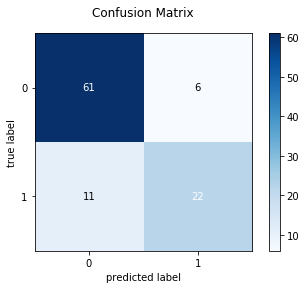

In [10]:
# Building the Confusion Matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cnf_matrix,colorbar=True)
plt.title('Confusion Matrix')
plt.show()

In [11]:
#Model Evaluation with evaluation metrics
from sklearn import metrics as mt
print("Accuracy:",mt.accuracy_score(y_test, y_pred).round(3))
print("Precision:",mt.precision_score(y_test, y_pred).round(3))
print("Recall:",mt.recall_score(y_test, y_pred).round(3))

Accuracy: 0.83
Precision: 0.786
Recall: 0.667
